<a href="https://colab.research.google.com/github/ozgeakar/FE/blob/main/OzgeAkarFS_Tecnical_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

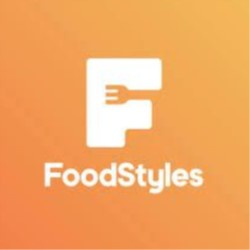

# Technical challenge
Özge Akar, Data Scientist

The goal of the challenge is to make sense of the dataset and understand it in such a way that informed, data-based business decisions can be made. To make things easier, the challenge is split into three conceptually independent parts, with action points at each part. 

# Libraries

---



In [4]:
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Loading

---



In [21]:
data = pd.read_csv("/content/dataset.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
print(data)

            restaurant_link                  restaurant_name  \
0       g10001637-d10002227                           Le 147   
1       g10001637-d14975787                 Le Saint Jouvent   
2        g10002858-d4586832                  Au Bout du Pont   
3        g10002986-d3510044              Le Relais de Naiade   
4        g10022428-d9767191             Relais Du MontSeigne   
...                     ...                              ...   
349889   g1435787-d12852855                Restaurante Onaya   
349890    g1435787-d1443865      Restaurante Parador de Moya   
349891    g1435787-d3685262  Meson Las Campanas del Miliario   
349892    g1435787-d3971084    Area de servicio Hotel Marino   
349893    g1435787-d5795131     Restaurante Buendia Honrubia   

                                        original_location country  \
0       ["Europe", "France", "Nouvelle-Aquitaine", "Ha...  France   
1       ["Europe", "France", "Nouvelle-Aquitaine", "Ha...  France   
2       ["Europe", "Fran

# Data Cleaning

--- 



## 1.	Identify the columns with mixed data types.

In [8]:
mixed_columns = []
for col in data.columns:
    if data[col].apply(lambda x: type(x) != type(data[col][0])).any():
        mixed_columns.append(col)

print(mixed_columns)
#It seems out data columns' types are mixed in general

['region', 'province', 'city', 'latitude', 'longitude', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free', 'original_open_hours', 'open_days_per_week', 'open_hours_per_week', 'working_shifts_per_week', 'avg_rating', 'total_reviews_count', 'default_language', 'reviews_count_in_default_language', 'excellent', 'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere', 'keywords']


## 2.	For each column, count the number of rows per data type.

In [9]:
result = {}
for col in data.columns:
    result[col] = data[col].apply(type).value_counts().to_dict()

print(result)
# An undeniable mess:)

{'restaurant_link': {<class 'str'>: 151142}, 'restaurant_name': {<class 'str'>: 151142}, 'original_location': {<class 'str'>: 151142}, 'country': {<class 'str'>: 151142}, 'region': {<class 'str'>: 151140, <class 'float'>: 2}, 'province': {<class 'str'>: 132787, <class 'float'>: 18355}, 'city': {<class 'str'>: 151012, <class 'float'>: 130}, 'address': {<class 'str'>: 151142}, 'latitude': {<class 'float'>: 151142}, 'longitude': {<class 'float'>: 151142}, 'claimed': {<class 'str'>: 150978, <class 'float'>: 164}, 'awards': {<class 'float'>: 108890, <class 'str'>: 42252}, 'popularity_detailed': {<class 'str'>: 140783, <class 'float'>: 10359}, 'popularity_generic': {<class 'str'>: 140523, <class 'float'>: 10619}, 'top_tags': {<class 'str'>: 137825, <class 'float'>: 13317}, 'price_level': {<class 'str'>: 122172, <class 'float'>: 28970}, 'price_range': {<class 'float'>: 100116, <class 'str'>: 51026}, 'meals': {<class 'str'>: 99526, <class 'float'>: 51616}, 'cuisines': {<class 'str'>: 129338, <

## 3.	Would removing missing values solve the mixed data type problem?

For this case; many columns have both data types; removing missing values may not solve the mixed data type problem. Converting the columns with mixed data types to a specific data type can make sense for the data and use that for analysis. I hesitate to jump conclusions, delete blanks and convert the data in hurry, I will not take any action, then I will decide based on analysis requirements for each case.
For example, the variable awards has 75% of null, deleting this much of data can be hazardous.

In [10]:
missing_values = data.isna().sum()

# calculate the percentage of missing values
missing_values_percentage = (missing_values / len(data)) * 100

print(missing_values_percentage)

restaurant_link                       0.000000
restaurant_name                       0.000000
original_location                     0.000000
country                               0.000000
region                                0.001323
province                             12.144209
city                                  0.086012
address                               0.000000
latitude                              1.206151
longitude                             1.206151
claimed                               0.108507
awards                               72.044832
popularity_detailed                   6.853820
popularity_generic                    7.025843
top_tags                              8.810920
price_level                          19.167405
price_range                          66.239695
meals                                34.150666
cuisines                             14.426169
special_diets                        82.386100
features                             60.558283
vegetarian_fr

# Data understanding



---



## 1.	Are the review columns correlated with the rating columns? 
●	Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]

●	Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]


In [25]:
review_columns = data[["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]]
rating_columns = data[["food", "service", "value", "atmosphere", "avg_rating"]]

In [26]:
# Enforce all variables to be numeric
for col in review_columns+rating_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [27]:
# Remove any rows containing NaN values
data.dropna(inplace=True)


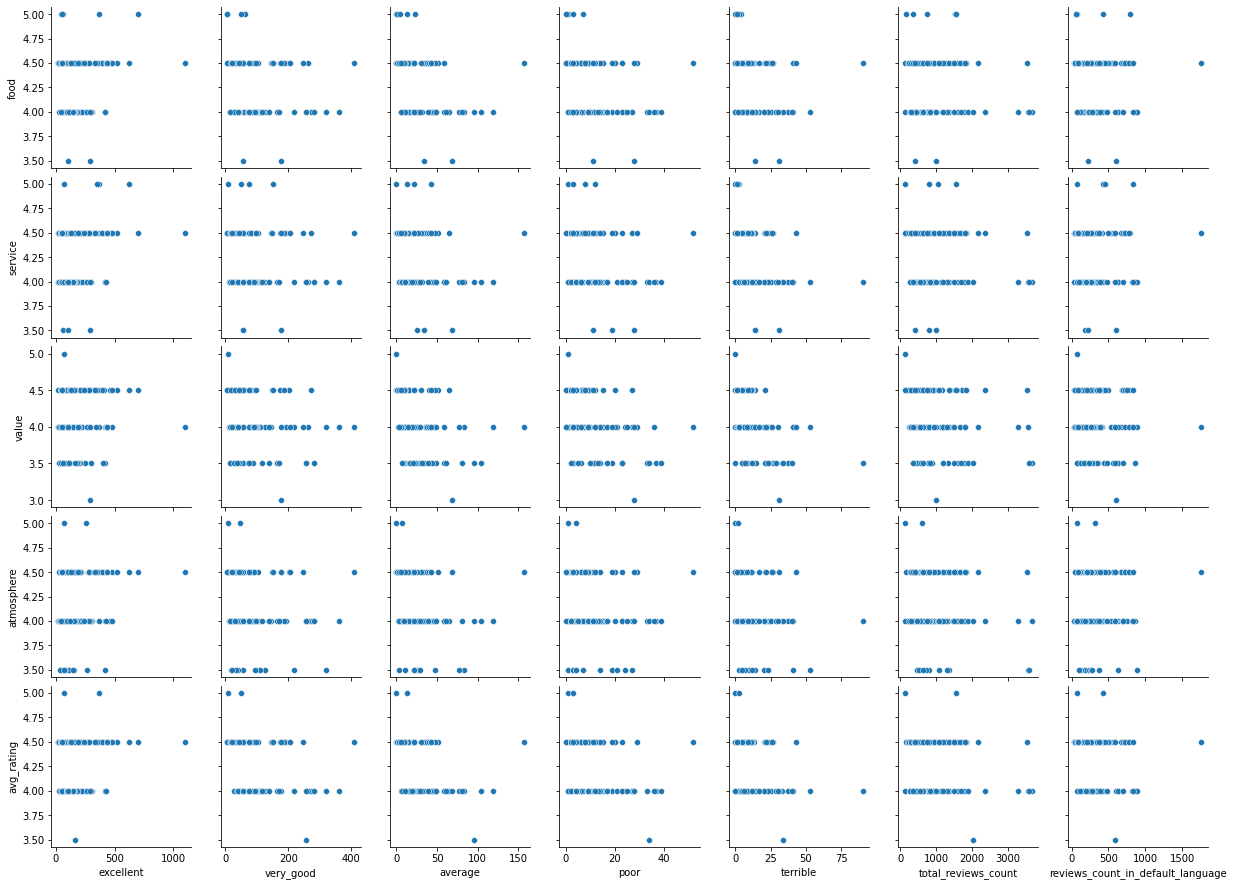

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, x_vars=review_columns.columns, y_vars=rating_columns.columns)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


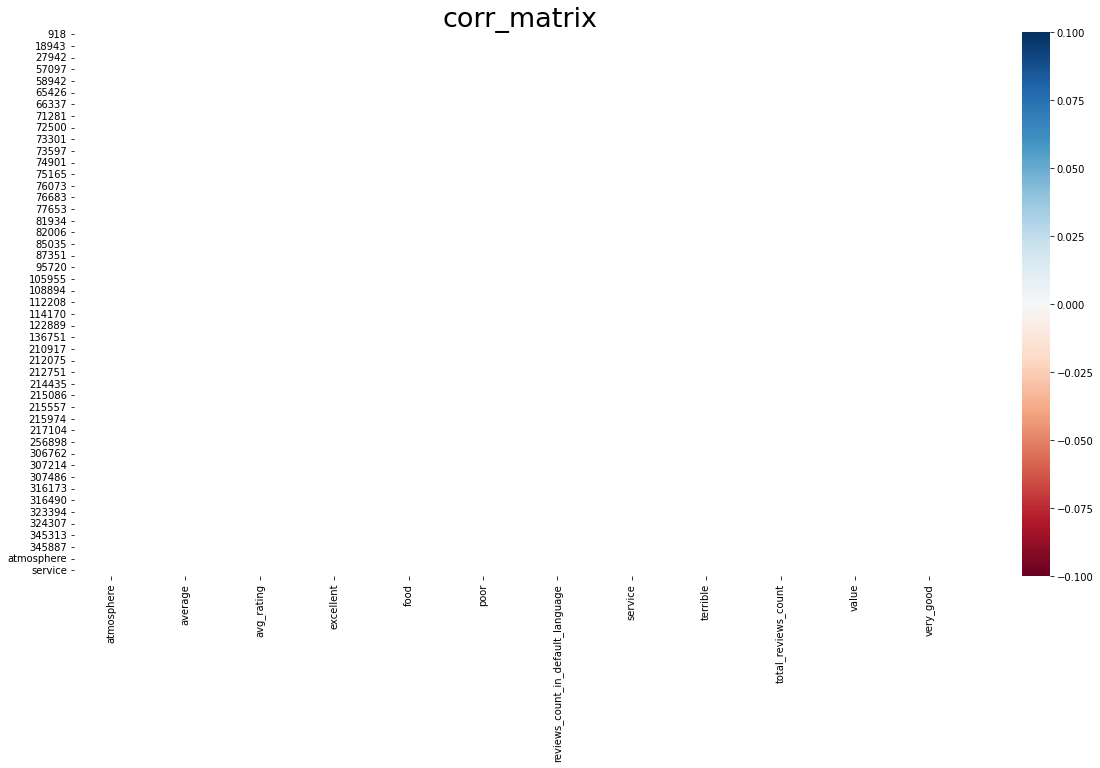

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(review_columns+rating_columns.corr(), annot=True, cmap= 'RdBu')
plt.title('corr_matrix', fontsize=27)
plt.show()

More than it is visible here, I have used many other techniques to check if there is a correlation. However, it Looks like we cave no correlation story here!

## 2.	Are vegetarian-friendly restaurants better than non-vegetarian ones?

For this step, I will check variables "vegetarian_friendly", "avg_rating", and "total_reviews_count". 

In "total_reviews_count": I will ignore the rows which has less then "mean" value of review counts as we cannot trust only 1 person's review, the first 10 people probably would be restaurant owner and her family anyway:)

In [41]:
data_Vegi = pd.read_csv("/content/dataset.csv")
# As I mentioned earlier, instead of a general act of "data cleaning" I will go case by case. 

In [42]:
# Convert 'mean_reviews_count' column to numeric
data_Vegi['mean_reviews_count'] = pd.to_numeric(data_Vegi['total_reviews_count'], errors='coerce')

# Drop rows with missing values
data_Vegi.dropna(subset=['total_reviews_count'], inplace=True)

# Find mean of 'mean_reviews_count' column
mean_reviews_count = data_Vegi['total_reviews_count'].mean()
mean_reviews_count

91.54200053510085

In [43]:
data_Vegi.drop(data_Vegi[data_Vegi['total_reviews_count'] < 92].index, inplace=True)


Now we can review:

In [45]:
# Convert 'avg_rating' column to numeric
data_Vegi['avg_rating'] = pd.to_numeric(data_Vegi['avg_rating'], errors='coerce')

# Drop rows with missing or invalid values
data_Vegi.dropna(subset=['avg_rating'], inplace=True)
data_Vegi = data_Vegi[data_Vegi['avg_rating'] <= 5]

In [46]:
# Create DataFrame for vegetarian-friendly restaurants
veg_friendly = data_Vegi[data_Vegi['vegetarian_friendly'] == 'Y']

# Create DataFrame for non-vegetarian-friendly restaurants
non_veg_friendly = data_Vegi[data_Vegi['vegetarian_friendly'] == 'N']

# Find the mean rating for each group
veg_friendly_mean = veg_friendly['avg_rating'].mean()
non_veg_friendly_mean = non_veg_friendly['avg_rating'].mean()

print("Mean rating for vegetarian-friendly restaurants:", veg_friendly_mean)
print("Mean rating for non-vegetarian-friendly restaurants:", non_veg_friendly_mean)

Mean rating for vegetarian-friendly restaurants: 4.161132877793081
Mean rating for non-vegetarian-friendly restaurants: 3.880056986499627


In [47]:
from scipy.stats import chisquare

# Create an array of the observed mean ratings
observed = [veg_friendly_mean, non_veg_friendly_mean]

# Create an array of the expected mean ratings (assuming equal means)
expected = [sum(observed) / len(observed)] * len(observed)

# Perform the chi-square test
chi_square, p_value = chisquare(observed, expected)

print("Chi-square test statistic:", chi_square)
print("p-value:", p_value)


Chi-square test statistic: 0.009824871443121769
p-value: 0.9210426039120171


Since the p-value is greater than 0.05, we fail to reject the null hypothesis, which means that there is no significant association between the vegetarian-friendly category and the mean rating. In other words, the mean rating of vegetarian-friendly restaurants is not significantly different from the mean rating of non-vegetarian-friendly restaurants.

## 3.	Are there any significantly more expensive cuisines?

In [50]:
data_Exp = pd.read_csv("/content/dataset.csv")

In [51]:
data_Exp = data_Exp[['price_level','price_range', 'cuisines']]
data_Exp.dropna(inplace=True)
data_Exp

,price_level,price_range,cuisines
5,€€-€€€,€14-€29,French
6,€€-€€€,€8-€17,"French, European"
7,€€-€€€,€10-€35,"French, European"
8,€€-€€€,€12-€26,"French, Cafe, Deli, Contemporary, Gastropub"
9,€€-€€€,€12-€30,"French, European, Wine Bar"
...,...,...,...
578788,€€-€€€,€5-€18,"Bar, British, Pub, Cafe, Seafood"
578791,€€-€€€,€5-€20,"Bar, British, Pub"
578799,€€-€€€,€6-€17,"Bar, British"
578828,€,€2-€8,"British, Cafe"


Below code is counting the number of occurrences of each unique value in the column of the data_Exp DataFrame, and normalizing the counts so that they represent relative frequencies (i.e., proportions) rather than absolute counts.

In [52]:
data_Exp['price_level'].value_counts(normalize=True)

€€-€€€    0.757116
€         0.190536
€€€€      0.052348
Name: price_level, dtype: float64

In [53]:
data_Exp['price_range'].value_counts(normalize=True)

€10-€30    0.018443
€5-€15     0.017743
€10-€20    0.017325
€10-€25    0.014993
€5-€20     0.014454
             ...   
€43-€66    0.000006
€8-€176    0.000006
€33-€96    0.000006
€39-€50    0.000006
€56-€56    0.000006
Name: price_range, Length: 4889, dtype: float64

In [54]:
data_Exp['cuisines'].value_counts(normalize=True)

French                                        0.071792
French, European                              0.035967
Spanish                                       0.034168
Mediterranean, Spanish                        0.023139
Italian, Pizza                                0.016920
                                                ...   
Dutch, European, Soups                        0.000006
Fast food, German, Dutch, European            0.000006
German, European, Grill, Pub, Gastropub       0.000006
European, Fusion, German, Central European    0.000006
Bar, British, Pub, Cafe, Seafood              0.000006
Name: cuisines, Length: 32938, dtype: float64

In [55]:
data_Exp.groupby(['price_range','price_level', 'cuisines']).size().unstack()

,cuisines,Afghani,"Afghani, Asian","Afghani, Azerbaijani, Asian, Pakistani, Persian","Afghani, Bar, Grill, Pub, Middle Eastern, Persian","Afghani, Central Asian","Afghani, Central Asian, Arabic","Afghani, French","Afghani, French, Middle Eastern","Afghani, Indian, Middle Eastern, Pakistani","Afghani, Mediterranean, Spanish",...,"Wine Bar, Seafood, Spanish","Wine Bar, Soups","Wine Bar, Southern-Italian, Italian, Mediterranean","Wine Bar, Spanish","Wine Bar, Spanish, Deli","Wine Bar, Spanish, Deli, Pub, Gastropub","Wine Bar, Sri Lankan","Wine Bar, Steakhouse, German, Barbecue, European, Greek, Diner, Central European","Wine Bar, Street Food, Bar, Pub","Wine Bar, Street Food, Italian, French, European"
price_range,price_level,,,,,,,,,,,,,,,,,,,,,
CHF 0-CHF 4,€€-€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHF 1-CHF 3,€€-€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHF 10-CHF 10,€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHF 10-CHF 110,€€-€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHF 10-CHF 12,€€-€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
€99-€109,€€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
€99-€119,€€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
€99-€139,€€€€,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data_Exp['price_range'] = data_Exp['price_range'].replace(',','.', regex=True)

In [57]:
data_Exp = data_Exp.drop(data_Exp[data_Exp['price_range'] == 'CHF'].index, axis=0)

In [58]:
# I have calculated the values like €10-€30 as (10+30)/2 to have best possible amount.
import re

def extract_average_price(price_str):
    match = re.findall(r'\d+', price_str)
    if len(match) == 2:
        return (int(match[0]) + int(match[1])) / 2
    else:
        return None

data_Exp['price_range'] = data_Exp['price_range'].apply(extract_average_price)

In [59]:
# I have mapped the € the in my understanding
mapping = {'€': '10', '€€-€€€': '100', '€€€€': '1000'}
data_Exp.replace(mapping, inplace=True)


In [60]:
data_Exp

,price_level,price_range,cuisines
5,100,21.5,French
6,100,12.5,"French, European"
7,100,22.5,"French, European"
8,100,19.0,"French, Cafe, Deli, Contemporary, Gastropub"
9,100,21.0,"French, European, Wine Bar"
...,...,...,...
578788,100,11.5,"Bar, British, Pub, Cafe, Seafood"
578791,100,12.5,"Bar, British, Pub"
578799,100,11.5,"Bar, British"
578828,10,5.0,"British, Cafe"


In [61]:
# Taken the first cuisine type in row, as I reckon it is the main one.
data_Exp = data_Exp[data_Exp['cuisines'].str.split(',').apply(lambda x: all([i.strip() != "" for i in x]))]
data_Exp['cuisines'] = data_Exp['cuisines'].str.split(',').apply(lambda x: x[0])

In [62]:
data_Exp['cuisines'].value_counts(normalize=True)

French           0.204720
Italian          0.106918
Mediterranean    0.089207
Spanish          0.063782
Bar              0.054840
                   ...   
Assyrian         0.000006
Bahamian         0.000006
Salvadoran       0.000006
Sardinian        0.000006
Jamaican         0.000006
Name: cuisines, Length: 139, dtype: float64

In [63]:
data_Exp['price_level'] = pd.to_numeric(data_Exp['price_level'], errors='coerce')

In [64]:
data_Exp

,price_level,price_range,cuisines
5,100,21.5,French
6,100,12.5,French
7,100,22.5,French
8,100,19.0,French
9,100,21.0,French
...,...,...,...
578788,100,11.5,Bar
578791,100,12.5,Bar
578799,100,11.5,Bar
578828,10,5.0,British


In [65]:
data_Exp.describe().T

,count,mean,std,min,25%,50%,75%,max
price_level,155671.0,129.964541,207.478402,10.0,100.0,100.0,100.0,1000.0
price_range,155459.0,18.806779,18.123807,1.0,10.0,15.0,22.0,761.5


According to https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Minimum_wage_statistics#:~:text=Highlights&text=In%20July%202022%20the%20minimum,313%20per%20month%20in%20Luxembourg. we can take minumum wage of France, Germany, Netherlands around 1680 Euro. 
Also, as far as I understanf from this https://www.econstor.eu/bitstream/10419/35646/1/597870764.pdf if a meal is 120 Euro, we can tell it is expensive. 

In [66]:
data_Exp.groupby('cuisines')[['price_range']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

price_range                                              
                   max       mean median        std       skew   min
cuisines                                                            
Afghani           27.5  15.250000  15.00   6.012854   0.093949   6.0
African          177.5  16.420886  14.00  11.890425   6.423879   2.0
Albanian          13.0  11.333333  11.00   1.527525   0.935220  10.0
Algerian          31.0  18.857143  20.00   7.679596   0.244544   8.5
American         600.0  12.874791  11.00  14.204054  21.324351   1.0
...                ...        ...    ...        ...        ...   ...
Uzbek             16.0  11.750000  11.75   6.010408        NaN   7.5
Venezuelan        52.5  10.742647   9.00   7.084507   3.466441   3.5
Vietnamese       252.5  13.846278  10.50  15.741773  11.685989   3.5
Welsh             60.0  19.884615  14.00  16.942493   1.980466   8.0
Wine Bar         403.0  22.713693  16.00  30.682449   7.550090   3.0

[139 rows x 6 columns]

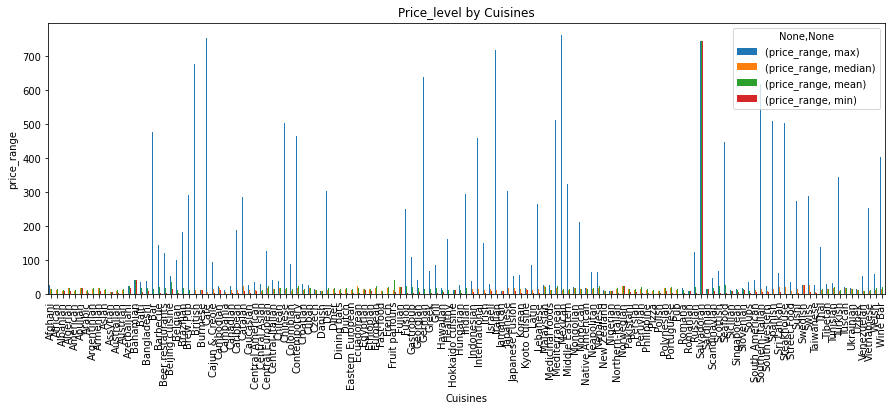

In [67]:
agg_data = data_Exp.groupby('cuisines')[['price_range']].agg({'min', 'max', 'mean', 'median'})
agg_data.plot(kind='bar',figsize=(15,5))
plt.xlabel('Cuisines')
plt.ylabel('price_range')
plt.title('Price_level by Cuisines')
plt.show()

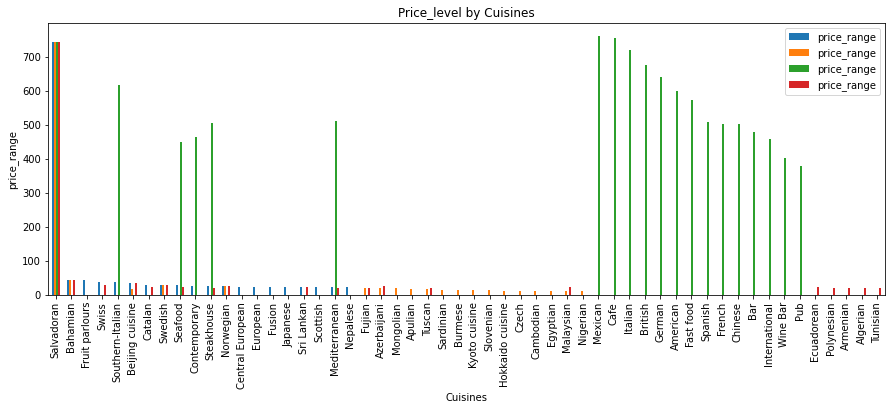

In [68]:
agg_data_mean = data_Exp.groupby('cuisines')[['price_range']].mean().sort_values(by='price_range',ascending=False).head(20)
agg_data_min = data_Exp.groupby('cuisines')[['price_range']].min().sort_values(by='price_range',ascending=False).head(20)
agg_data_max = data_Exp.groupby('cuisines')[['price_range']].max().sort_values(by='price_range',ascending=False).head(20)
agg_data_median = data_Exp.groupby('cuisines')[['price_range']].median().sort_values(by='price_range',ascending=False).head(20)
agg_data = pd.concat([agg_data_mean, agg_data_min,agg_data_max,agg_data_median], axis=1)
agg_data.plot(kind='bar',figsize=(15,5))
plt.xlabel('Cuisines')
plt.ylabel('price_range')
plt.title('Price_level by Cuisines')
plt.show()


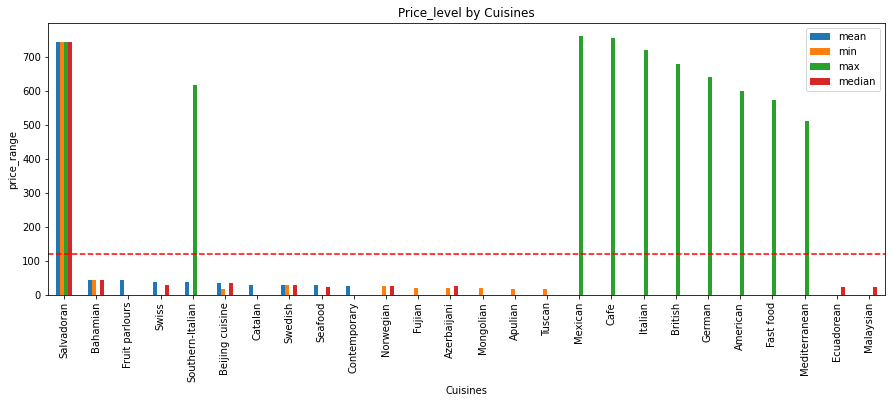

In [85]:
agg_data_mean = data_Exp.groupby('cuisines')[['price_range']].mean().sort_values(by='price_range',ascending=False).head(10)
agg_data_min = data_Exp.groupby('cuisines')[['price_range']].min().sort_values(by='price_range',ascending=False).head(10)
agg_data_max = data_Exp.groupby('cuisines')[['price_range']].max().sort_values(by='price_range',ascending=False).head(10)
agg_data_median = data_Exp.groupby('cuisines')[['price_range']].median().sort_values(by='price_range',ascending=False).head(10)
agg_data = pd.concat([agg_data_mean, agg_data_min,agg_data_max,agg_data_median], axis=1)
agg_data.columns = ['mean', 'min', 'max', 'median']
agg_data.plot(kind='bar',figsize=(15,5))
plt.xlabel('Cuisines')
plt.ylabel('price_range')
plt.title('Price_level by Cuisines')
plt.axhline(120, color='r', linestyle='--')
plt.show()


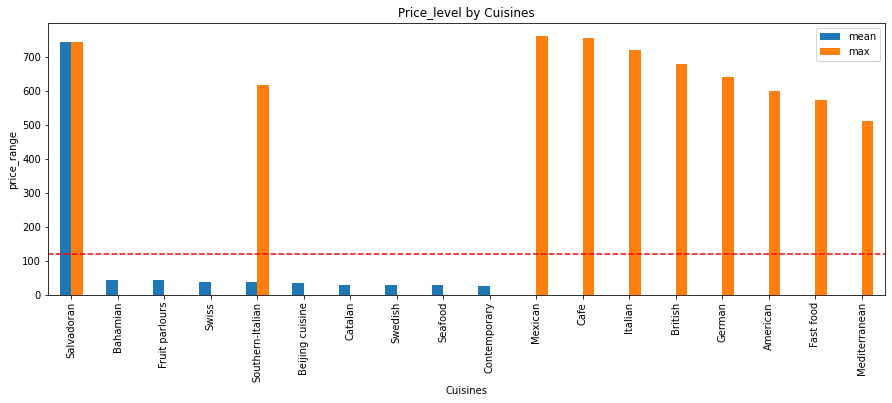

In [86]:
agg_data_mean = data_Exp.groupby('cuisines')[['price_range']].mean().sort_values(by='price_range',ascending=False).head(10)
agg_data_max = data_Exp.groupby('cuisines')[['price_range']].max().sort_values(by='price_range',ascending=False).head(10)
agg_data = pd.concat([agg_data_mean, agg_data_max], axis=1)
agg_data.columns = ['mean', 'max']
agg_data.plot(kind='bar',figsize=(15,5))
plt.xlabel('Cuisines')
plt.ylabel('price_range')
plt.title('Price_level by Cuisines')
plt.axhline(120, color='r', linestyle='--')
plt.show()

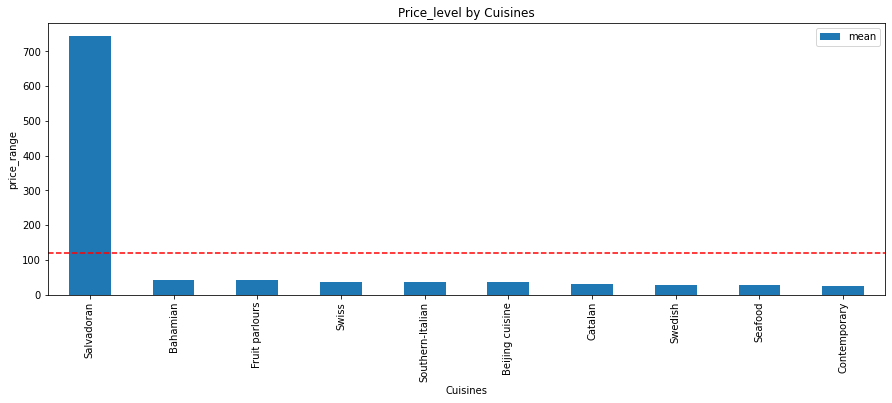

In [84]:
agg_data_mean = data_Exp.groupby('cuisines')[['price_range']].mean().sort_values(by='price_range',ascending=False).head(10)
agg_data = pd.concat([agg_data_mean], axis=1)
agg_data.columns = ['mean']
agg_data.plot(kind='bar',figsize=(15,5))
plt.axhline(120, color='r', linestyle='--') 
plt.xlabel('Cuisines')
plt.ylabel('price_range')
plt.title('Price_level by Cuisines')
plt.show()


Since we are talking about "significantly more expensive cuisines" we cannot rely on maximum value, we need to review, mean value of cuisines. Quick conclusion can mislead us so by cheking the minumum wage, and the mean value, Salvadoran cuisine can be called as significantly more expensive. I still wanted to check the maximum value to double check my results.

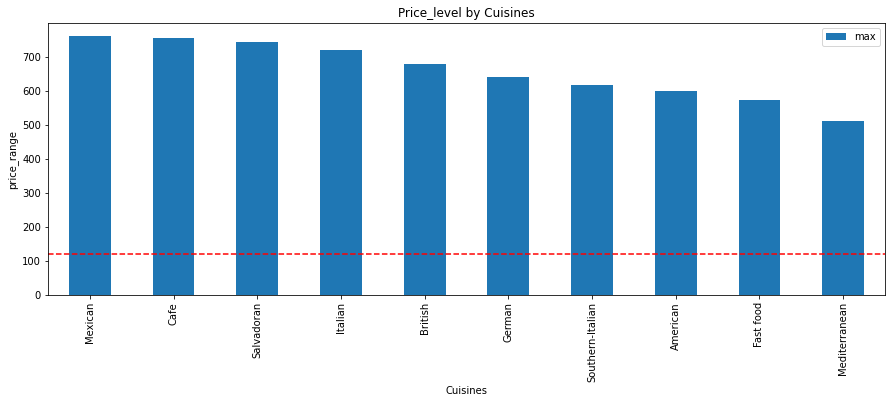

In [87]:
agg_data_max = data_Exp.groupby('cuisines')[['price_range']].max().sort_values(by='price_range',ascending=False).head(10)
agg_data = pd.concat([ agg_data_max], axis=1)
agg_data.columns = ['max']
agg_data.plot(kind='bar',figsize=(15,5))
plt.xlabel('Cuisines')
plt.ylabel('price_range')
plt.title('Price_level by Cuisines')
plt.axhline(120, color='r', linestyle='--')
plt.show()

# Business-specific

---

## 1.	In the assets directory, you will see a very small dataset called europe_capitals_population_and_area.csv. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?

In [118]:
data_Cap = pd.read_csv("/content/europe_capitals_population_and_area.csv")

In [119]:
data_Cap

,CityNo;City;Country;Population;Area in km2
1;Amsterdam;Netherland;851573;219,32.0
2;Athens;Greece;664046;2929,NaN
4;Barcelona;Spain;1620809;101,4.0
4;Berlin;Germany;3711930;891,7.0
5;Bratislava;Slovakia;424428;367,6.0
6;Brussels;Belgium;1191604;161,38.0
7;Budapest;Hungary;1779361;525,2.0
8;Copenhagen;Denmark;602481;88,25.0
9;Dublin;Ireland;527612;115,NaN
10;Edinburgh;Scotland;482005;264,NaN


In [120]:
data_Cap = pd.read_csv("/content/europe_capitals_population_and_area.csv", delimiter=";")

In [121]:
data_Cap

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"
5,6,Brussels,Belgium,1191604,"161,38"
6,7,Budapest,Hungary,1779361,"525,2"
7,8,Copenhagen,Denmark,602481,"88,25"
8,9,Dublin,Ireland,527612,115
9,10,Edinburgh,Scotland,482005,264


In [122]:
data_Gluten = pd.read_csv("/content/dataset.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [123]:
data_Gluten['gluten_free'] = data_Gluten['gluten_free'].map({'Y': 1, 'N': 0})

In [124]:
data_Gluten = data_Gluten.dropna(subset=['city'])

In [125]:
# Merge data_Cap and data_Gluten on 'City'
merged_df = data_Cap.merge(data_Gluten, left_on='City', right_on='city')

In [126]:
merged_df

,CityNo,City,Country,Population,Area in km2,restaurant_link,restaurant_name,original_location,country,region,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,1,Amsterdam,Netherland,851573,"219,32",g188590-d10021431,Yum Yum Thai,"[""Europe"", ""The Netherlands"", ""North Holland P...",The Netherlands,NaN,...,8.0,10.0,4.0,1.0,1.0,3.5,3.5,3.5,NaN,NaN
1,1,Amsterdam,Netherland,851573,"219,32",g188590-d10026199,Koffie & Zo,"[""Europe"", ""The Netherlands"", ""North Holland P...",The Netherlands,NaN,...,10.0,3.0,0.0,0.0,1.0,4.5,4.5,4.5,NaN,NaN
2,1,Amsterdam,Netherland,851573,"219,32",g188590-d10026731,Tostini,"[""Europe"", ""The Netherlands"", ""North Holland P...",The Netherlands,NaN,...,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,Amsterdam,Netherland,851573,"219,32",g188590-d10026908,Hout,"[""Europe"", ""The Netherlands"", ""North Holland P...",The Netherlands,NaN,...,8.0,2.0,0.0,1.0,0.0,5.0,5.0,5.0,NaN,NaN
4,1,Amsterdam,Netherland,851573,"219,32",g188590-d10027139,Three Chefs,"[""Europe"", ""The Netherlands"", ""North Holland P...",The Netherlands,NaN,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95967,29,Vienna,Austria,1889083,"414,6",g190454-d9978084,Kent Restaurant Penzing,"[""Europe"", ""Austria"", ""Vienna Region"", ""Vienna""]",Austria,Vienna Region,...,2.0,1.0,2.0,1.0,0.0,4.5,4.5,4.5,NaN,NaN
95968,29,Vienna,Austria,1889083,"414,6",g190454-d9980241,Blaue Bar,"[""Europe"", ""Austria"", ""Vienna Region"", ""Vienna""]",Austria,Vienna Region,...,31.0,4.0,1.0,0.0,0.0,4.5,4.0,4.0,NaN,NaN
95969,29,Vienna,Austria,1889083,"414,6",g190454-d9984426,Reformhaus Wallner,"[""Europe"", ""Austria"", ""Vienna Region"", ""Vienna""]",Austria,Vienna Region,...,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
95970,29,Vienna,Austria,1889083,"414,6",g190454-d9993277,NT Bánh Mì,"[""Europe"", ""Austria"", ""Vienna Region"", ""Vienna""]",Austria,Vienna Region,...,3.0,1.0,0.0,0.0,0.0,5.0,5.0,5.0,NaN,NaN


In [127]:
# I create a new column that indicates whether or not the city has a gluten-free restaurant
merged_df["has_gluten_free"] = merged_df["gluten_free"].apply(lambda x: x == 1)

In [128]:
merged_df["no_has_gluten_free"] = merged_df["gluten_free"].apply(lambda x: x == 0)

In [129]:
# group by city and calculate the number of gluten-free restaurants
gluten_free_counts = merged_df.groupby("City")["has_gluten_free"].sum()
no_gluten_free_counts = merged_df.groupby("City")["no_has_gluten_free"].sum()

In [130]:
merged_df.groupby('City')[['has_gluten_free', 'no_has_gluten_free']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

has_gluten_free                                              \
                       max      mean median       std      skew    min   
City                                                                     
Amsterdam             True  0.142923    0.0  0.350034  2.041179  False   
Athens                True  0.092967    0.0  0.290437  2.804826  False   
Bratislava            True  0.047857    0.0  0.213540  4.240792  False   
Budapest              True  0.121732    0.0  0.327022  2.314715  False   
Copenhagen            True  0.102658    0.0  0.303574  2.619897  False   
Dublin                True  0.216806    0.0  0.412144  1.375246  False   
Helsinki              True  0.116511    0.0  0.320930  2.392664  False   
Lisbon                True  0.102072    0.0  0.302772  2.629570  False   
Lyon                  True  0.018430    0.0  0.134523  7.164537  False   
Madrid                True  0.112741    0.0  0.316289  2.449170  False   
Milan                 True  0.137676    0.0  0.344580  2.103490  False   
Munich                True  0.072976    0.0  0.260134  3.284977  False   
Paris                 True  0.032103    0.0  0.176279  5.309173  False   
Prague                True  0.064457    0.0  0.245586  3.548140  False   
Rome                  True  0.131239    0.0  0.337675  2.184470  False   
Stockholm             True  0.111179    0.0  0.314401  2.474915  False   
Vienna                True  0.090352    0.0  0.286717  2.858756  False   
Zurich               False  0.000000    0.0       NaN       NaN  False   

           no_has_gluten_free                                              
                          max      mean median       std      skew    min  
City                                                                       
Amsterdam                True  0.857077    1.0  0.350034 -2.041179  False  
Athens                   True  0.907033    1.0  0.290437 -2.804826  False  
Bratislava               True  0.952143    1.0  0.213540 -4.240792  False  
Budapest                 True  0.878268    1.0  0.327022 -2.314715  False  
Copenhagen               True  0.897342    1.0  0.303574 -2.619897  False  
Dublin                   True  0.783194    1.0  0.412144 -1.375246  False  
Helsinki                 True  0.883489    1.0  0.320930 -2.392664  False  
Lisbon                   True  0.897928    1.0  0.302772 -2.629570  False  
Lyon                     True  0.981570    1.0  0.134523 -7.164537  False  
Madrid                   True  0.887259    1.0  0.316289 -2.449170  False  
Milan                    True  0.862324    1.0  0.344580 -2.103490  False  
Munich                   True  0.927024    1.0  0.260134 -3.284977  False  
Paris                    True  0.967897    1.0  0.176279 -5.309173  False  
Prague                   True  0.935543    1.0  0.245586 -3.548140  False  
Rome                     True  0.868761    1.0  0.337675 -2.184470  False  
Stockholm                True  0.888821    1.0  0.314401 -2.474915  False  
Vienna                   True  0.909648    1.0  0.286717 -2.858756  False  
Zurich                   True  1.000000    1.0       NaN       NaN   True

In [140]:
city_data = merged_df.groupby('City').agg({'has_gluten_free': 'sum', 'Population': 'sum'})
city_data['gluten_free_density'] = city_data['has_gluten_free'] / city_data['Population']
city_data = city_data.sort_values(by='gluten_free_density', ascending=True)
top_5_cities = city_data.head(5)
print(top_5_cities[['gluten_free_density']])


        gluten_free_density
City                       
Zurich         0.000000e+00
Paris          1.454948e-08
Madrid         3.588204e-08
Lyon           3.637878e-08
Rome           4.574715e-08


Above you can see the European capitals where gluten-free restaurants are underrepresented. Therefore, my recommendation is Zurich, Paris, Madrid, Lyon and Rome.
I also analyzed with different techniques what I see is there is no significant wrong answer here, as there are no massive different numbers can be found in other capitals as well.

## 2.	Think and propose a couple of other ways this dataset could be used to help businesses.

There is no consistency in data in terms of mixed data types and blank values. The data should not consist of some numbers, and some texts. The data collectors can receive a refresh training, or the app to collect data can be reviewed.

As removing missing values could have created other significant problems, for almost every analyse I had to upload the data with different names. This was very time consuming also, I could not solely trust the data and take general actions not to mislead myself and the end user.

There are several multiple values under variable's rows such as under "meals" vairable, there are rows like "Dinner, Lunch, Drinks" or "Dinner, Lunch." For the variables like this;

* We can create a new binary variable for each possible value in the column, then we would create three new variables: "meals_Dinner", "meals_Lunch", and "meals_Drinks". Each of these variables would be binary (1 or 0) indicating whether the meal is available at that restaurant to handle categorical variables with multiple levels in machine learning models.

* Also, we can create a new variable for each value then assign each restaurant a value of 1 or 0 indicating if that meal is available or not.

There are other ways as well, but all sounds very time consuming. At the begining, this multiple data entry shall be considered differently.


# Bonus

In [142]:
data = pd.read_json("paris_bounding_polygon.json")
print(data)


            0          1
0    2.224169  48.853442
1    2.224161  48.853478
2    2.224143  48.853578
3    2.224135  48.853654
4    2.224129  48.853759
..        ...        ...
914  2.238144  48.850367
915  2.237800  48.850440
916  2.226361  48.852959
917  2.225560  48.853136
918  2.224169  48.853442

[919 rows x 2 columns]


In [143]:
data_Exp['cuisines'] 

5          French
6          French
7          French
8          French
9          French
           ...   
578788        Bar
578791        Bar
578799        Bar
578828    British
578830        Bar
Name: cuisines, Length: 155671, dtype: object

In [144]:
# filter the dataframe to only include rows where the 'cuisines' column is 'Italian' and 'city' column is 'Paris'
filtered_data = data_Exp[(data_Exp['cuisines'] == 'Italian') & (merged_df['City'] == 'Paris')]


# group the filtered data by location (latitude and longitude) and count the number of Italian restaurants in each location
location_counts = filtered_data.groupby([merged_df['latitude'], merged_df['longitude']]).size().reset_index(name='counts')


# find the location with the least number of Italian restaurants
best_location = location_counts.sort_values(by='counts').head(1)
print(best_location)


    latitude  longitude  counts
0  48.766293   2.323235       1


<ipython-input-144-37b7bc07e480>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = data_Exp[(data_Exp['cuisines'] == 'Italian') & (merged_df['City'] == 'Paris')]


In [145]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.reverse("48.766293, 2.323235", timeout=10)
print(location.address)


Rue Marc Sangnier, L'Haÿ-les-Roses, Arrondissement de L'Haÿ-les-Roses, Val-de-Marne, Île-de-France, France métropolitaine, 94240, France


In [148]:
import folium

map = folium.Map(location=[48.766293, 2.323235], zoom_start=13)
folium.Marker([48.766293, 2.323235]).add_to(map)
map


It seems like a very great spot for an Italian restaurant to be located in Paris!